In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Reading data from sauce


In [104]:
df = pd.read_csv("/home/ellah/ros2_ws/src/linear_regression_pkg/linear_regression_pkg/boston_housing.csv")
df

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [105]:
df = pd.read_csv("boston_housing.csv",sep=",", header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [106]:
print(df.columns.tolist())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# Drop MEDV

In [107]:
# Drop rows with missing target values
df = df.dropna(subset=['MEDV'])

# Features and Labels
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Data preprocesing


In [108]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 0].values

# Model Training(Split data)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print confirmation
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (361, 13)
Test data shape: (91, 13)


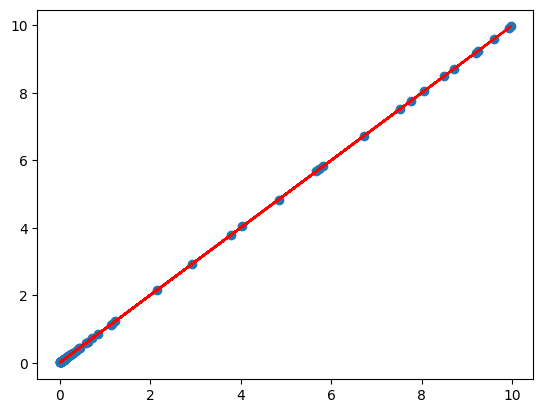

In [110]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
line = regressor.coef_[0] * X_test[:, 0] + regressor.intercept_

plt.scatter(X_test[:, 0], y_test)
plt.plot(X_test[:, 0], line, color='red')
plt.show()

# making Prediction

In [111]:
#testing
print(X_test)
    #model Prediction
y_pred = regressor.predict(X_test)

[[5.5610e-02 7.0000e+01 2.2400e+00 ... 1.4800e+01 3.7158e+02 4.7400e+00]
 [2.7630e-02 7.5000e+01 2.9500e+00 ... 1.8300e+01 3.9563e+02 4.3200e+00]
 [3.4270e-02 0.0000e+00 5.1900e+00 ... 2.0200e+01 3.9690e+02 9.8000e+00]
 ...
 [2.8750e-02 2.8000e+01 1.5040e+01 ... 1.8200e+01 3.9633e+02 6.2100e+00]
 [1.4320e-02 1.0000e+02 1.3200e+00 ... 1.5100e+01 3.9290e+02 3.9500e+00]
 [8.6640e-02 4.5000e+01 3.4400e+00 ... 1.5200e+01 3.9049e+02 2.8700e+00]]


# comparing actual result to the predicted model result

In [112]:
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df

,Actual,predicted
0,0.05561,0.05561
1,0.02763,0.02763
2,0.03427,0.03427
3,0.03466,0.03466
4,2.14918,2.14918
...,...,...
86,0.06263,0.06263
87,0.35233,0.35233
88,0.02875,0.02875
89,0.01432,0.01432


In [113]:
 #Estimating traing and test score
print("Training Score:", regressor.score(X_train,y_train))
print("Test Score:", regressor.score(X_test,y_test))

Training Score: 1.0
Test Score: 1.0


# MEansquared Error

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mse)  

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 3.901736229587966e-15
MSE: 2.0093765636047944e-29
RMSE: 4.482607013340333e-15


# Plotting bar graph to predict the differnces between the actual and predicted value

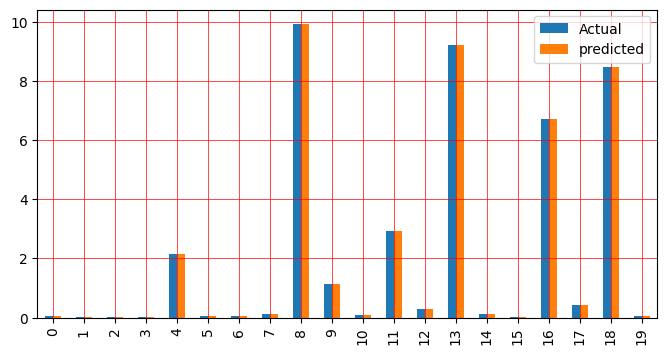

In [115]:
df.head(20).plot(kind='bar', figsize=(8,4))
plt.grid(which='major', linewidth=0.5, color='red')
plt.grid(which='minor', linewidth=0.2, color='blue')
plt.show()